In [20]:
import numpy as np
import pandas as pd

In [21]:
df=pd.read_csv('Advertising.csv')

In [22]:
df.sample(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
49,50,66.9,11.7,36.8,9.7
3,4,151.5,41.3,58.5,18.5
120,121,141.3,26.8,46.2,15.5
83,84,68.4,44.5,35.6,13.6
144,145,96.2,14.8,38.9,11.4


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [24]:
df=df.iloc[:,1:]

In [25]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
#check for null values

In [27]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [28]:
#statistical analysis
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [29]:
#Removing Outliers from NewsPaper
df=df[df['Newspaper']<=90]
df.shape

(198, 4)

In [30]:
#Data Visulaization

import matplotlib.pyplot as plt
import seaborn as sns

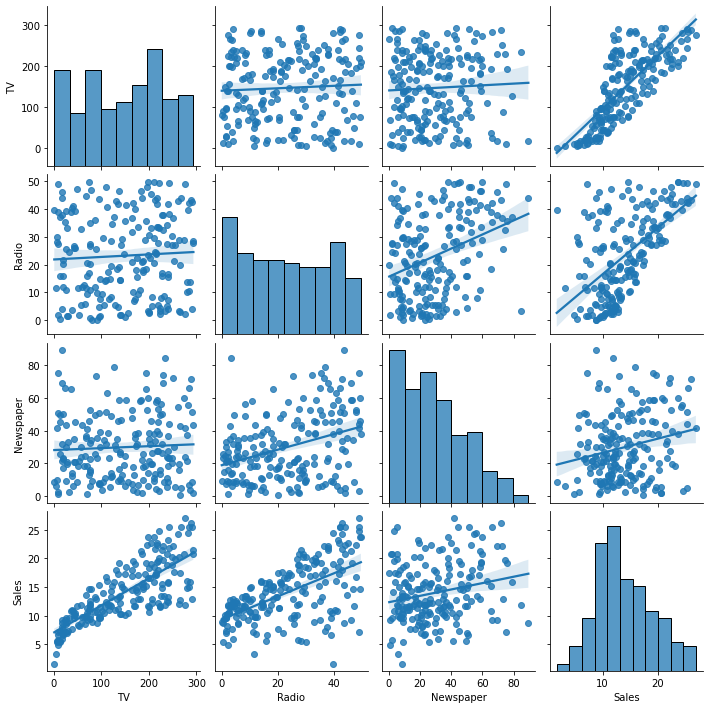

In [31]:
sns.pairplot(df,kind='reg')

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

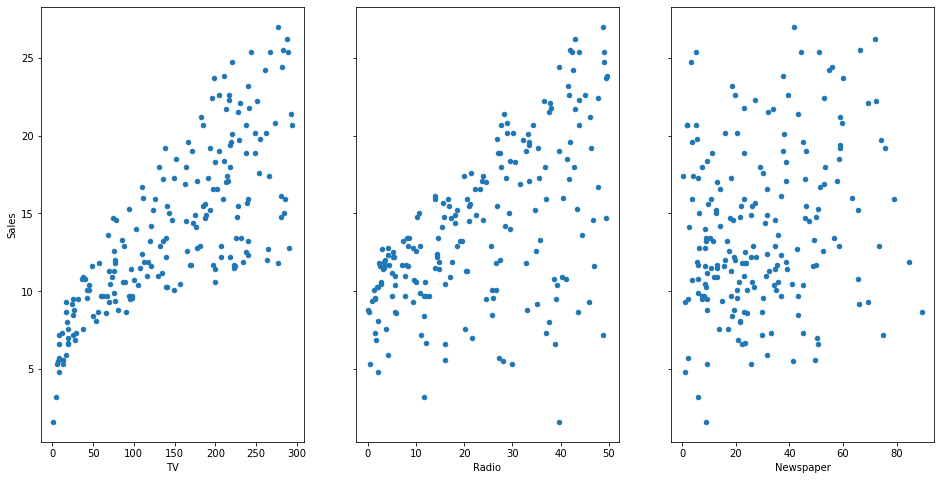

In [32]:
fig,axs= plt.subplots(1,3,sharey=True)
df.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
df.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
df.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

<AxesSubplot:>

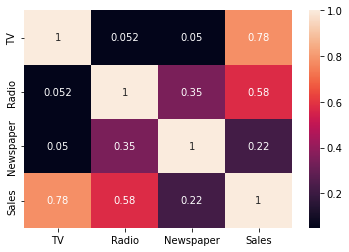

In [49]:
#Checking the data Corerelation
heatmp = df.corr()
sns.heatmap(heatmp,annot=True)

In [34]:
#Seperating the input and output
x=df.drop(columns="Sales")
y=df['Sales']

In [35]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [36]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [38]:
#Seperating the training and Testing Data


In [37]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [41]:
x_train.head()

,TV,Radio,Newspaper
65,69.0,9.3,0.9
98,289.7,42.3,51.2
12,23.8,35.1,65.9
150,280.7,13.9,37.0
54,262.7,28.8,15.9


In [42]:
y_train.head()

65      9.3
98     25.4
12      9.2
150    16.1
54     20.2
Name: Sales, dtype: float64

In [45]:
#Now we are applying Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [46]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [47]:
#Decision Tree Regression Model


dt=DecisionTreeRegressor(random_state=0)
pipe=make_pipeline(column_trans,scaler,dt)
pipe.fit(x_train,y_train)
y_pred_dt=pipe.predict(x_test)
r2_score(y_test,y_pred_dt)

0.9474799386890271

In [50]:
#Plotting & Visualizing the Decision Tree

from sklearn import tree

In [52]:
f_n=['TV', 'Radio', 'Newspaper']
c_n=df['Sales'].unique().astype(str)

[Text(0.4212533156498674, 0.9583333333333334, 'TV <= -0.215\nsquared_error = 26.475\nsamples = 158\nvalue = 14.282'),
 Text(0.15931697612732096, 0.875, 'TV <= -1.4\nsquared_error = 7.593\nsamples = 67\nvalue = 10.112'),
 Text(0.050397877984084884, 0.7916666666666666, 'TV <= -1.525\nsquared_error = 2.093\nsamples = 19\nvalue = 6.953'),
 Text(0.01856763925729443, 0.7083333333333334, 'TV <= -1.699\nsquared_error = 1.256\nsamples = 11\nvalue = 6.1'),
 Text(0.013262599469496022, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 3.2'),
 Text(0.023872679045092837, 0.625, 'Newspaper <= -0.688\nsquared_error = 0.457\nsamples = 10\nvalue = 6.39'),
 Text(0.010610079575596816, 0.5416666666666666, 'TV <= -1.674\nsquared_error = 0.04\nsamples = 2\nvalue = 5.5'),
 Text(0.005305039787798408, 0.4583333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 5.3'),
 Text(0.015915119363395226, 0.4583333333333333, 'squared_error = -0.0\nsamples = 1\nvalue = 5.7'),
 Text(0.03713527851458886, 0.541666666666666

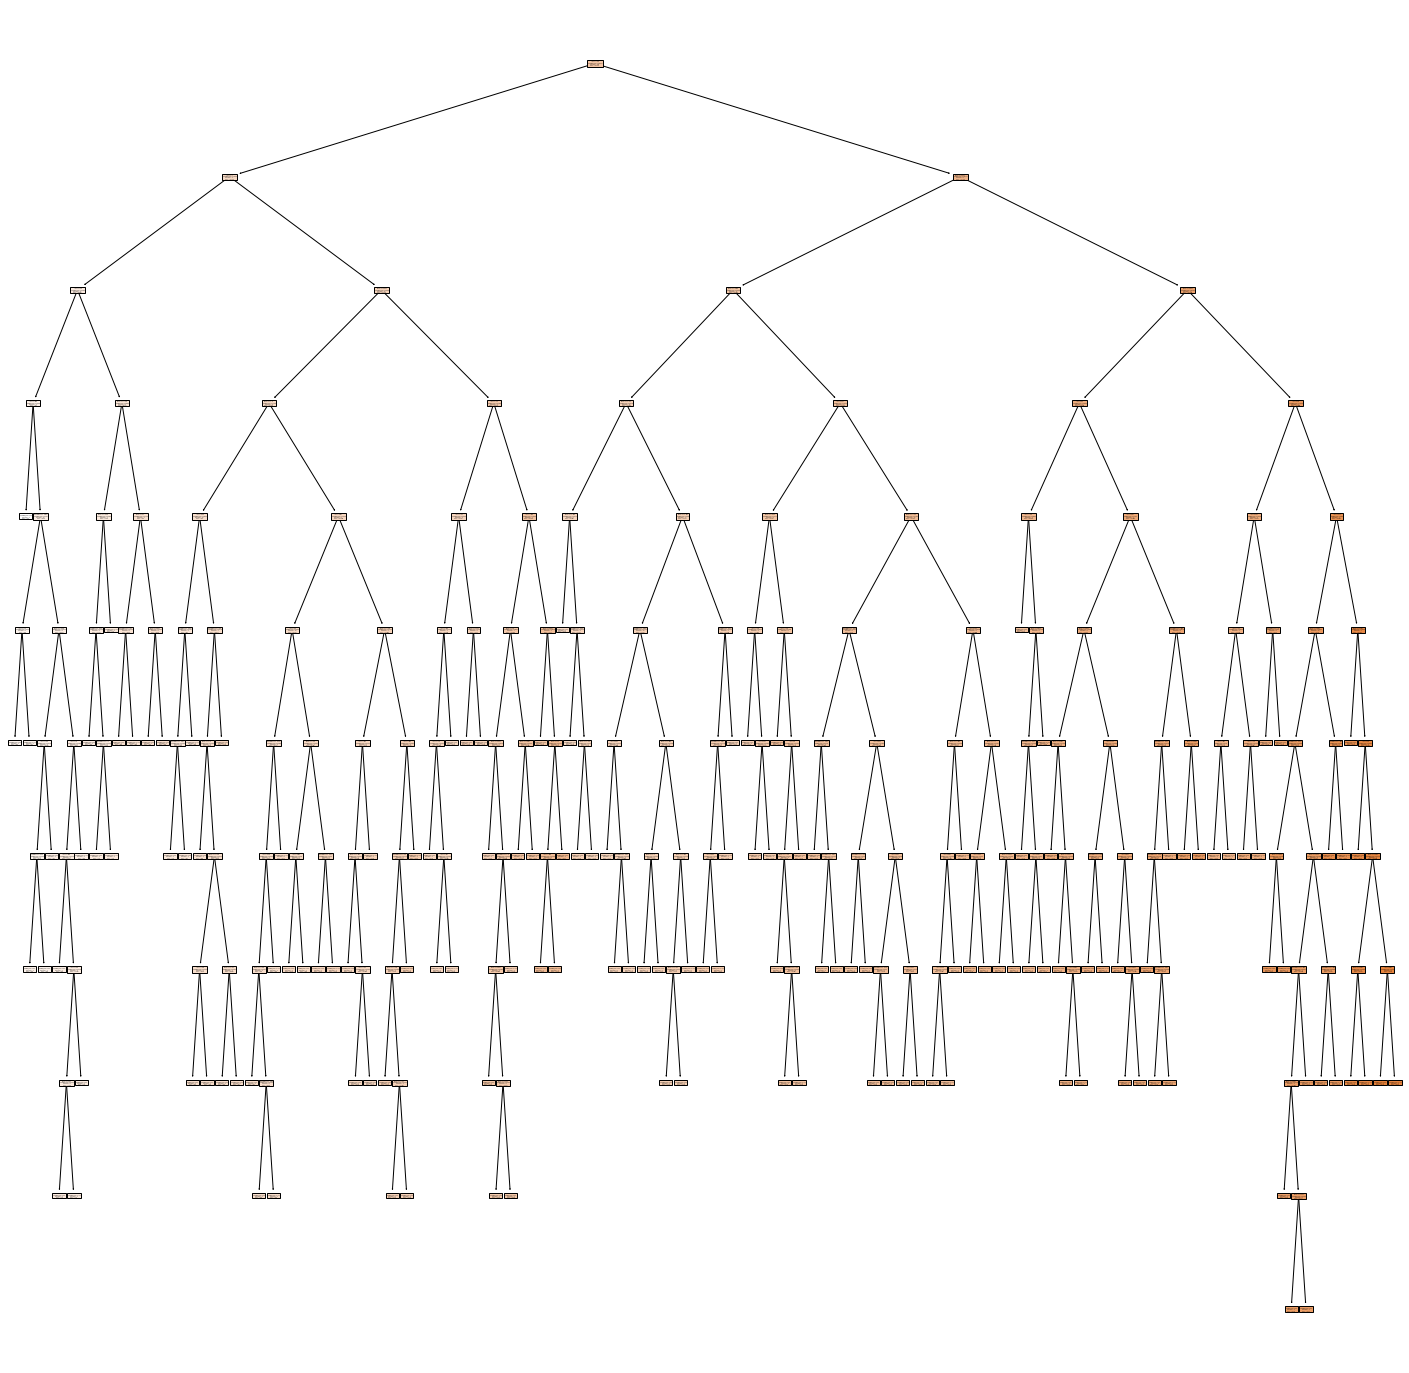

In [57]:
plt.figure(figsize=(25,25))
tree.plot_tree(dt, filled=True, feature_names=f_n, class_names=c_n)

In [58]:
#Prediction on Test Data
#Let's Check predict function working Good or Not

pipe.predict([[283.6,42.0,66.2]]) #Original ans 25.5

array([25.5])

In [59]:
pipe.predict([[112.9,17.4,38.6]]) #Original ans 11.9

array([11.9])

##### Now Lets Make The Model For Deployment

In [60]:
import pickle 

In [62]:
pickle.dump(pipe,open('sales.pkl','wb'))

## Thank You